# 北清问答

可能是出题人想考一考各位指导，今年问答题的部分题目增加了更多的步骤或出现了反直觉的答案，导致各位指导都无法正确回答。

### 北京大学新燕园校区的教学楼在启用时，全部教室共有多少座位（不含讲桌）？

老马池口人应该知道新燕园校区的各项综合管理目前仍然由昌平管委会主理。

[昌平管委会的网站](https://www.cpc.pku.edu.cn/info/1042/1076.htm#:~:text=%E4%BA%8C%E3%80%81%E6%95%99%E5%AE%A4%E8%A7%84%E6%A8%A1%E5%8F%8A%E5%8F%AF%E5%AE%B9%E7%BA%B3%E4%BA%BA%E6%95%B0) 包含以下两张图片：

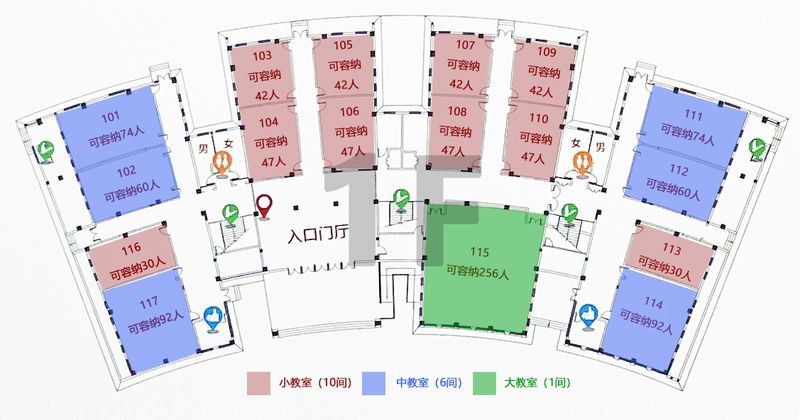

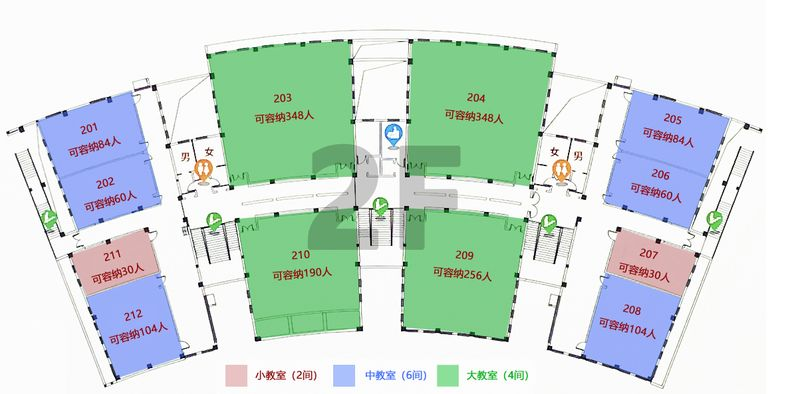

注意公共教学楼不是对称的，不能只算半边x2。我一开始就卡在了没注意到210和209的人数不一样。

**答案：2822**

做完我发现GPT指导能直接秒了：

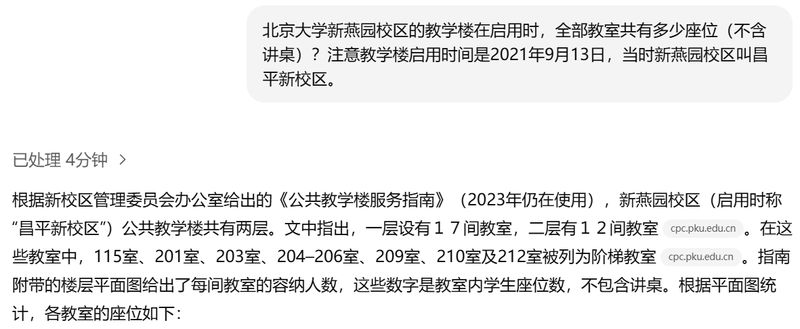

### 基于 SwiftUI 的 iPad App 要想让图片自然延伸到旁边的导航栏（如右图红框标出的效果），需要调用视图的什么方法？

首先这显然是iOS 26 liquid glass加的新活，和我iPad上的导航栏看到的完全不一样。
果子的开发者文档都在[这里](https://developer.apple.com)。谷歌搜索`liquid glass background naivigation site:developer.apple.com`，可以搜到[这个网页](https://developer.apple.com/documentation/TechnologyOverviews/adopting-liquid-glass)。

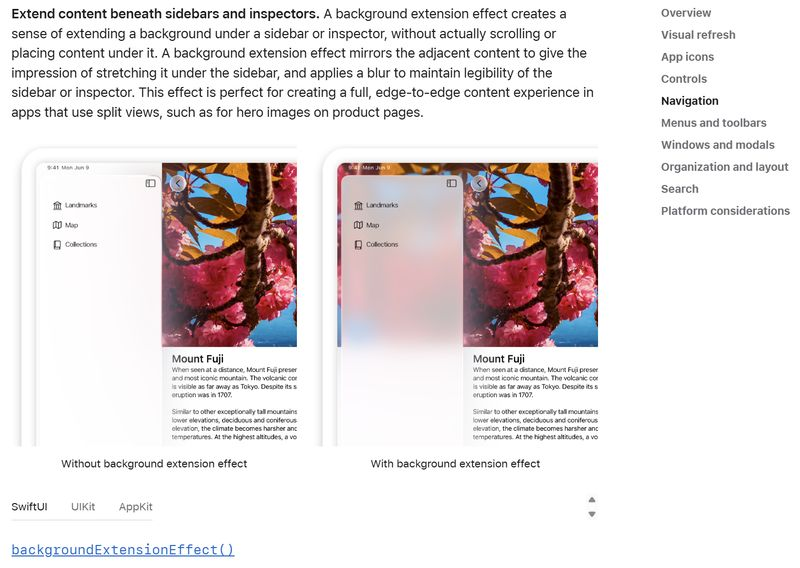


**答案：backgroundExtensionEffect**

### 右图这张照片是在飞机的哪个座位上拍摄的？

本题不是飞友做起来难度确实很大。首先我们先看附件：

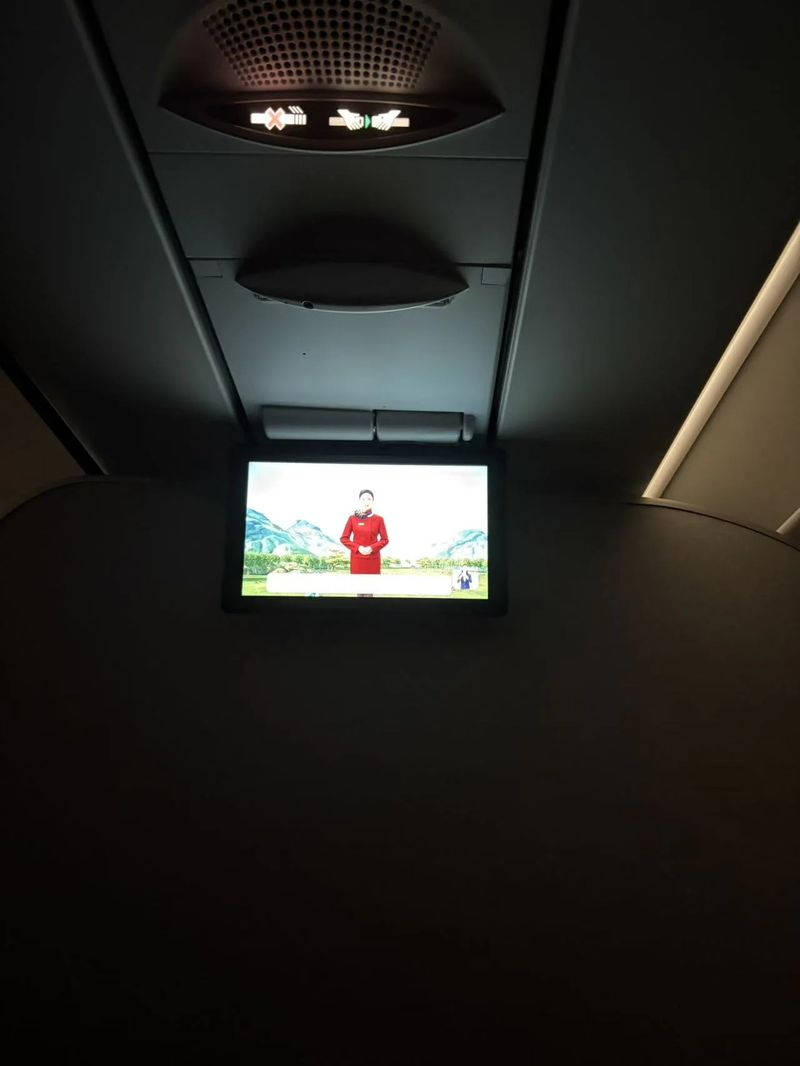

从这张图中我们能提取到的信息有：

- 航司的安全视频里空姐穿全身红，并且右下角有配手语。Accessibility拉满了，这显然不是什么小航司。
- 安全带指示灯与音响区域呈半圆形，这有助我们区分具体机型。
- 图片拍摄位置是侧边排，但是这个宽度看上去不像只有两个座位。
- 座位前面是隔板和显示器，一般飞机只有卫生间前后和舱位之间会有隔板。

Gemini指导告诉我这是海航。错了！我还真找到了B站安全视频博主把国内航司的安全视频遍历了一下，最后定位到[这个视频](https://www.bilibili.com/video/BV1WJ411v7b2/?spm_id_from=333.788.recommend_more_video.1&trackid=web_related_0.router-related-2206419-76tx6.1760909072292.855)。国航，看着挺对的。
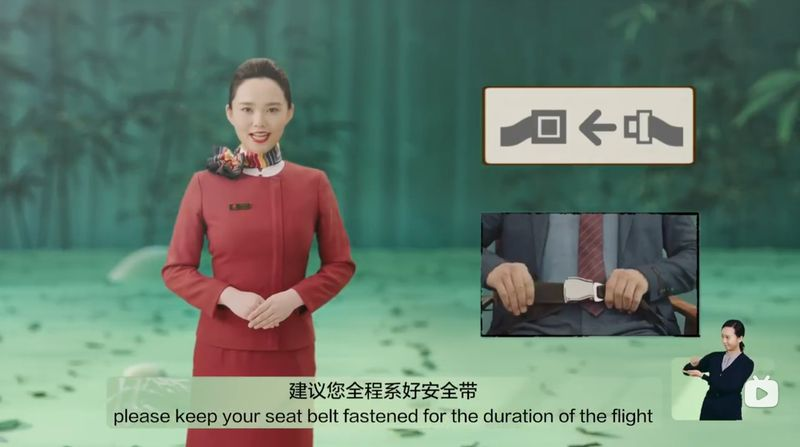

有关机型，国航运营的机型从数量上来看最多的是A320和B737。你可以从多个渠道（比如我是从[这里](https://flightsim.to/file/72584/fenix-a320-cfm-and-iae-modern-seatbealt-signs-and-no-portable-devices-signs)）确认，这个神秘形状肯定是A320。

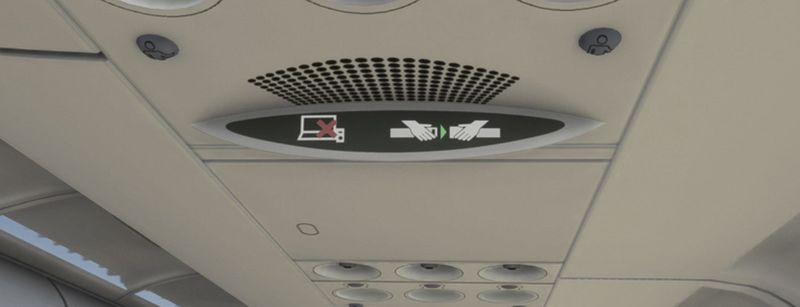

选座时间到！SeatGuru，用了都说好。从[A320座位图](https://www.seatguru.com/airlines/Air_China/Air_China_Airbus_A320.php)可以看出，座位11B和11K满足题目的要求，也有Overhead TV。国航A320的卫生间在最后，之后没有座位。至于A321，安全通道肯定不可能只有这么点距离。

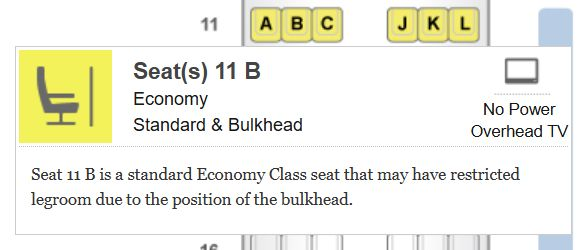

**答案：11K**

### 注意到比赛平台题目页面底部的【复制个人Token】按钮了吗？本届改进了 Token 生成算法，UID 为 1234567890 的用户生成的个人 Token 相比于上届的算法会缩短多少个字符？

这个不难，我们先找到比赛平台[更改token生成算法的commit](https://github.com/PKU-GeekGame/gs-backend/commit/bcd71d39)，看看先前和本届的token生成算法都是什么。

**答案：11**

In [9]:
!openssl ecparam -name secp256k1 -genkey -noout -out token.priv

In [ ]:
import base64
from cryptography.hazmat.primitives import serialization

with open('./token.priv', 'rb') as f:
    TOKEN_SIGNING_KEY = serialization.load_pem_private_key(
        f.read(),
        password=None,
    )
    
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes
def sign_token(uid: int) -> str:
    sig = base64.urlsafe_b64encode(TOKEN_SIGNING_KEY.sign(
        str(uid).encode(),
        ec.ECDSA(hashes.SHA256()),
    )).decode()
    return f'{uid}:{sig}'

def gen_keys() -> tuple[str, str]:
    sk = SigningKey.generate()
    vk = sk.verify_key

    sk_enc = sk.encode(encoder=URLSafeBase64Encoder).decode('utf-8')
    vk_enc = vk.encode(encoder=URLSafeBase64Encoder).decode('utf-8')

    return sk_enc, vk_enc

def load_sk(sk_enc: str) -> SigningKey:
    return SigningKey(sk_enc.strip().encode('utf-8'), encoder=URLSafeBase64Encoder)

def load_vk(vk_enc: str) -> VerifyKey:
    return VerifyKey(vk_enc.strip().encode('utf-8'), encoder=URLSafeBase64Encoder)

def sign_token_new(sk: SigningKey, uid: int) -> str:
    assert uid>=0
    encoded = struct.pack('<Q', int(uid)).rstrip(b'\x00')
    sig = sk.sign(encoded, encoder=URLSafeBase64Encoder).decode()
    return f'GgT-{sig}'

len(sign_token_new(SigningKey.generate(), 1234567890))

len(sign_token(1234567890)) - len(sign_token_new(SigningKey.generate(), 1234567890))

11

### 最后一个默认情况下允许安装 Manifest V1 .crx 扩展程序的 Chrome 正式版本是多少？

本题的答案相当反常识，所以各位指导都做不出来。Gemini指导的回答是：“Chrome 32 是支持 Manifest V1 的最后一个正式版本”，这个答案来自[Chrome的文档](https://developer.chrome.com/docs/extensions/mv2/manifestVersion)。但是当你尝试提交的时候，会发现格式不对。啊？

别急，再试着搜搜谷歌。往后几条会给出以下两个issue的链接：

[crbug40571327](https://issues.chromium.org/issues/40571327)

[crbug40564764](https://issues.chromium.org/issues/40564764)

蛤，怎么在2018年才真的移除？生产队的驴都没这么能摸鱼，真的不会被优化吗？不急，我们可以在这两条issue里找到如下commit的链接：

https://chromium.googlesource.com/chromium/src.git/+/6c5c219bd2ad58651dcb596b1211ce948d67a53a

这个commit最早出现在什么版本里呢？google source上我没找到，试试GitHub：

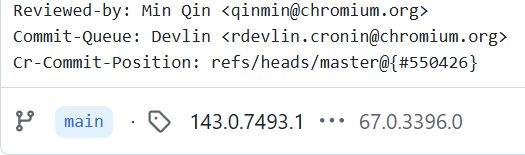

可以知道最早包含这个commit的版本是 67.0.3396.0。题目问的是正式版本，我们可以从[这里](httpa://slimjet.com/chrome/google-chrome-old-version.php)看到Chrome历史正式版本的版本号，67.0.3396.0并非正式版。

**答案：66**

### 此论文提到的 YOLOv12-L 目标检测模型实际包含多少个卷积算子？

论文给出了一个GitHub的链接，GitHub上有指向huggingface和colab的badge。模型结构其实很容易dump出来，在[Colab文档](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov12-object-detection-model.ipynb) 里执行`print(model)`就行。

奇怪的是本题依旧是难住了各位指导。直接把输出喂进去，GPT和Gemini指导的答案是228，Claude指导的答案是180。我们还可以使用其它的模型结构可视化工具，直接从pt文件得到模型结构。这里强烈推荐以下能在浏览器里直接跑的[Netron](https://netron.app/)，上传`yolov12l.pt`可以直接得到答案。

**答案：212**

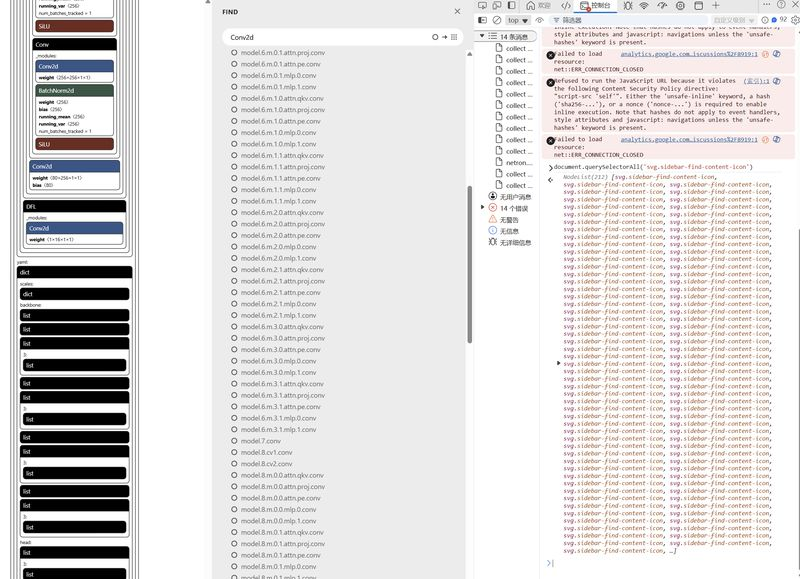